In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import xml.etree.ElementTree as ET
from sklearn.preprocessing import StandardScaler

In [23]:
root_annots="C:\\Users\\Mohamed\\Desktop\\ML\\image\\Annotation"
root_images = "C:\\Users\\Mohamed\\Desktop\\ML\\image\\Images"

In [24]:
def bounding_box(image ,b):
    bpath = root_annots+str("/"+b+"/"+str(image.split(".")[0]))
    tree = ET.parse(bpath)
    root = tree.getroot()
    objects = root.findall('object')
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

    return (xmin,ymin,xmax,ymax)

In [25]:
dataset_path = root_images

class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
images_list=[]
labels_list=[]

sift = cv2.SIFT_create()
sift_features = []


for class_folder in class_folders:
    class_name = os.path.basename(class_folder)


    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        xmin , ymin ,xmax,ymax = bounding_box(image_filename,class_name)
        image = cv2.imread(image_path)
        cropped_img = image[ymin:ymax, xmin:xmax]
        resized_img = cv2.resize(cropped_img, (64, 64))

        labels_list.append(int(class_name))
        images_list.append(resized_img)


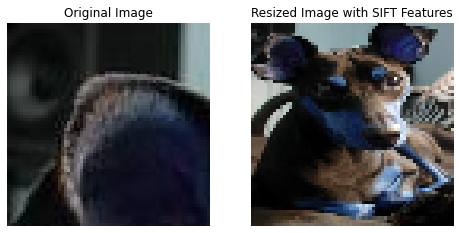

In [26]:
class_folders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]
sift = cv2.SIFT_create()
sift_features = []


for class_folder in class_folders:
    class_name = os.path.basename(class_folder)

    for image_filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_filename)

        gray_image = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(gray_image, None)
        sift_features.append(descriptors)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(cropped_img, cmap=plt.cm.gray)
        ax1.set_title('Original Image')

        ax2.axis('off')
        ax2.imshow(resized_img, cmap=plt.cm.gray)
        ax2.set_title('Resized Image with SIFT Features')

        plt.show()

        break

   
    break


In [27]:
images_list = np.array(images_list)

In [28]:
sift_features = []

In [29]:
sift = cv2.SIFT_create()

In [30]:
for img in images_list:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    keypoints, descriptors = sift.detectAndCompute(gray, None)

    sift_features.append(descriptors)

sift_features = np.array(sift_features)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_9052\3482497958.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_features = np.array(sift_features)


In [31]:
flat_sift_features = [des.flatten() for des in sift_features]
max_length = max(len(des) for des in flat_sift_features)
padded_sift_features = [np.pad(des, (0, max_length - len(des)), 'constant') for des in flat_sift_features]


print(f"Dimension of Resulted Features: {max_length}")


for i in range(min(6, len(padded_sift_features))):
    print(f"Feature {i + 1}: {padded_sift_features[i]}")

Dimension of Resulted Features: 13568
Feature 1: [ 1.  1. 49. ...  0.  0.  0.]
Feature 2: [0. 0. 0. ... 0. 0. 0.]
Feature 3: [0. 0. 0. ... 0. 0. 0.]
Feature 4: [0. 0. 3. ... 0. 0. 0.]
Feature 5: [101.   3.   0. ...   0.   0.   0.]
Feature 6: [ 1. 34. 27. ...  0.  0.  0.]


In [32]:
sift_array = np.array(padded_sift_features)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(sift_array)

for cluster_id in range(num_clusters):
    num_images_in_cluster = np.sum(cluster_labels == cluster_id)
    print(f"Cluster {cluster_id}: {num_images_in_cluster} images")

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: 151 images
Cluster 1: 260 images
Cluster 2: 112 images
Cluster 3: 182 images
Cluster 4: 206 images


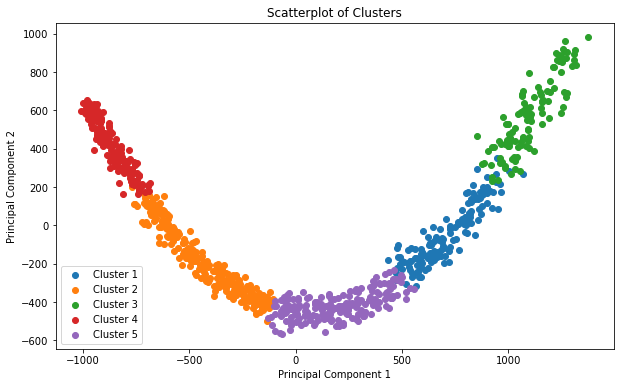

In [33]:
pca = PCA(n_components=2)
dataset_2d = pca.fit_transform(sift_array)
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_points = dataset_2d[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster + 1}')

plt.title('Scatterplot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()





C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


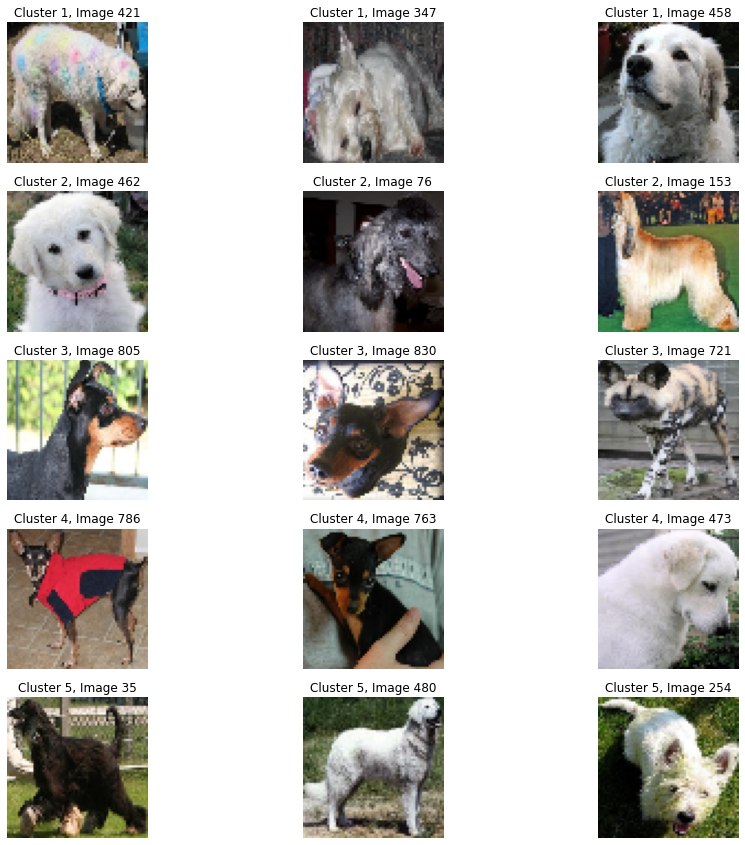

In [38]:
import numpy as np

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(sift_array)

# Create a figure with a grid layout
fig, axes = plt.subplots(num_clusters, 5, figsize=(15, 15))

for cluster_id in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]  # Get all indices in the cluster
    selected_indices = np.random.choice(cluster_indices, size=min(5, len(cluster_indices)), replace=False)

    for i, img_index in enumerate(selected_indices):
        img = images_list[img_index]
        axes[cluster_id, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[cluster_id, i].axis('off')
        axes[cluster_id, i].set_title(f'Cluster {cluster_id + 1}, Image {img_index + 1}')

plt.show()
